In [61]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.split import temporal_train_test_split
from sktime.param_est.stationarity import StationarityADF
from sktime.transformations.series.difference import Differencer
from statsmodels.tsa.stattools import grangercausalitytests
from sktime.utils.plotting import plot_series
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.var import VAR
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [62]:
df = pd.read_csv('final.csv')
df.head()

,Period,Consumer Price Index (2012=100),Index of Industrial Production,Wholesale Price Index (2011-12=100),Consumer Price Index for Agricultural Labourer,Consumer Price Index for Rural Labourer,Consumer Price Index for Food and Beverages,Net Foreign Direct Investment (US $ Million),FCNR(B)-Foreign Currency Non-Resident (Banks) (US $ Million),Foreign Trade Exports Total (US $ Million),...,Consumer Price Index for Rural Labourer_lag_3,Consumer Price Index for Rural Labourer_lag_4,Consumer Price Index for Rural Labourer_lag_5,Consumer Price Index for Rural Labourer_lag_6,Consumer Price Index for Food and Beverages_lag_1,Consumer Price Index for Food and Beverages_lag_2,Consumer Price Index for Food and Beverages_lag_3,Consumer Price Index for Food and Beverages_lag_4,Consumer Price Index for Food and Beverages_lag_5,Consumer Price Index for Food and Beverages_lag_6
0,2018-11-01,140.8,126.1,121.6,914.0,921.0,139.7,1076.61,20433.31,26071.56,...,909.000000,903.666667,899.000000,896.333333,140.666667,141.166667,140.833333,139.633333,138.333333,137.600000
1,2018-12-01,140.1,133.9,119.7,913.0,921.0,138.2,3112.49,20839.86,27858.29,...,914.000000,909.000000,903.666667,899.000000,140.000000,140.666667,141.166667,140.833333,139.633333,138.333333
2,2019-01-01,139.6,134.4,119.2,915.0,923.0,137.4,3681.52,21413.04,26407.36,...,917.333333,914.000000,909.000000,903.666667,139.266667,140.000000,140.666667,141.166667,140.833333,139.633333
3,2019-02-01,139.9,127.6,119.5,917.0,925.0,137.5,1949.20,21623.30,26862.08,...,919.333333,917.333333,914.000000,909.000000,138.433333,139.266667,140.000000,140.666667,141.166667,140.833333
4,2019-03-01,140.4,144.1,119.9,924.0,932.0,138.1,789.18,23170.18,32725.19,...,920.666667,919.333333,917.333333,914.000000,137.700000,138.433333,139.266667,140.000000,140.666667,141.166667


In [63]:
df['Period'] = pd.to_datetime(df['Period'], errors='coerce')

df.sort_values(by='Period', inplace=True)
df.set_index('Period', inplace=True)
df.head()

,Consumer Price Index (2012=100),Index of Industrial Production,Wholesale Price Index (2011-12=100),Consumer Price Index for Agricultural Labourer,Consumer Price Index for Rural Labourer,Consumer Price Index for Food and Beverages,Net Foreign Direct Investment (US $ Million),FCNR(B)-Foreign Currency Non-Resident (Banks) (US $ Million),Foreign Trade Exports Total (US $ Million),Foreign Trade Imports Total (US $ Million),...,Consumer Price Index for Rural Labourer_lag_3,Consumer Price Index for Rural Labourer_lag_4,Consumer Price Index for Rural Labourer_lag_5,Consumer Price Index for Rural Labourer_lag_6,Consumer Price Index for Food and Beverages_lag_1,Consumer Price Index for Food and Beverages_lag_2,Consumer Price Index for Food and Beverages_lag_3,Consumer Price Index for Food and Beverages_lag_4,Consumer Price Index for Food and Beverages_lag_5,Consumer Price Index for Food and Beverages_lag_6
Period,,,,,,,,,,,,,,,,,,,,,
2018-11-01,140.8,126.1,121.6,914.0,921.0,139.7,1076.61,20433.31,26071.56,43655.19,...,909.000000,903.666667,899.000000,896.333333,140.666667,141.166667,140.833333,139.633333,138.333333,137.600000
2018-12-01,140.1,133.9,119.7,913.0,921.0,138.2,3112.49,20839.86,27858.29,42351.02,...,914.000000,909.000000,903.666667,899.000000,140.000000,140.666667,141.166667,140.833333,139.633333,138.333333
2019-01-01,139.6,134.4,119.2,915.0,923.0,137.4,3681.52,21413.04,26407.36,41455.21,...,917.333333,914.000000,909.000000,903.666667,139.266667,140.000000,140.666667,141.166667,140.833333,139.633333
2019-02-01,139.9,127.6,119.5,917.0,925.0,137.5,1949.20,21623.30,26862.08,36591.13,...,919.333333,917.333333,914.000000,909.000000,138.433333,139.266667,140.000000,140.666667,141.166667,140.833333
2019-03-01,140.4,144.1,119.9,924.0,932.0,138.1,789.18,23170.18,32725.19,43690.44,...,920.666667,919.333333,917.333333,914.000000,137.700000,138.433333,139.266667,140.000000,140.666667,141.166667


In [64]:
targets = [
    'Consumer Price Index  (2012=100)',
    'Consumer Price Index for Agricultural Labourer',
    'Consumer Price Index for Rural Labourer',
    'Consumer Price Index for Food and Beverages'
]

<h2>Univariate Forecasting<h2>

In [65]:
df.shape

(78, 43)

In [66]:
num_of_rows = 62
future_context = 16
y, y_actual = temporal_train_test_split(df, train_size=num_of_rows, test_size=future_context, anchor="end")
y.shape

(62, 43)

In [67]:
# Ensure the index is a DatetimeIndex with a string frequency
y_cpindex = y['Consumer Price Index  (2012=100)']
if not isinstance(y_cpindex.index, pd.PeriodIndex):
    y_cpindex.index = y_cpindex.index.to_period('M')

forecaster = NaiveForecaster(strategy='last', sp=12)
fh = np.arange(1, future_context + 1)

forecaster.fit(y_cpindex)
y_pred = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Consumer Price Index  (2012=100)'>)

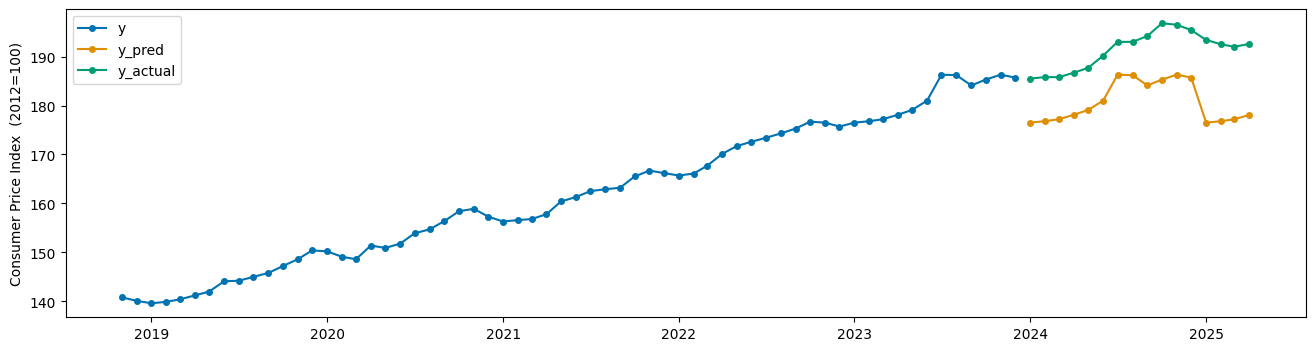

In [68]:
if not isinstance(y_pred.index, pd.PeriodIndex):
	y_pred.index = y_pred.index.to_period('M')

y_actual = y_actual['Consumer Price Index  (2012=100)'] if isinstance(y_actual, pd.DataFrame) else y_actual
if not isinstance(y_actual.index, pd.PeriodIndex):
	y_actual.index = y_actual.index.to_period('M')

plot_series(y_cpindex, y_pred, y_actual, labels=["y", "y_pred", "y_actual"])

In [69]:
mean_absolute_percentage_error(y_actual, y_pred) * 100

np.float64(5.542166934072102)

In [70]:
forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)
forecaster.fit(y_cpindex)
y_pred = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Consumer Price Index  (2012=100)'>)

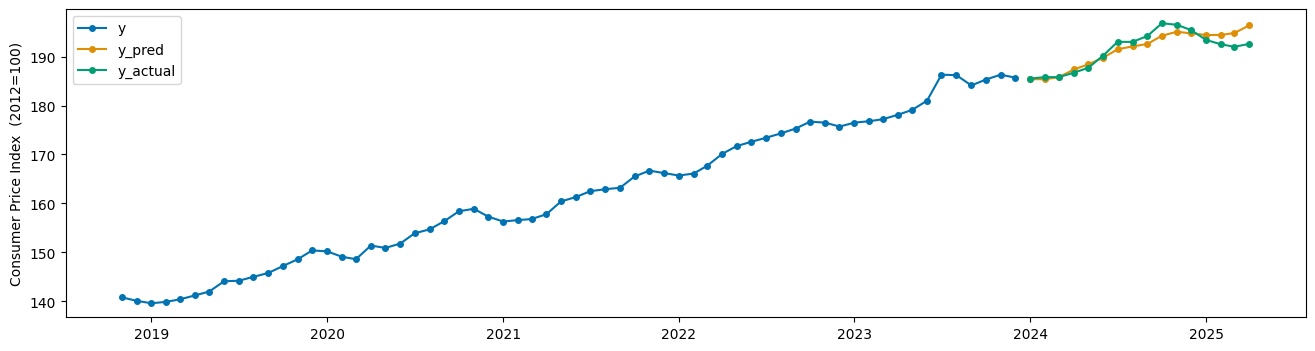

In [71]:
# Only convert to PeriodIndex if not already
if not isinstance(y_pred.index, pd.PeriodIndex):
	y_pred.index = y_pred.index.to_period('M')

y_actual = y_actual['Consumer Price Index  (2012=100)'] if isinstance(y_actual, pd.DataFrame) else y_actual
if not isinstance(y_actual.index, pd.PeriodIndex):
	y_actual.index = y_actual.index.to_period('M')

plot_series(y_cpindex, y_pred, y_actual, labels=["y", "y_pred", "y_actual"])

In [72]:
mean_absolute_percentage_error(y_actual, y_pred) * 100

np.float64(0.6676362565216097)

<h2>Multivariate Forecasting<h2>

In [73]:
selected_features = [
    'Index of Industrial Production',
    'Wholesale Price Index (2011-12=100)',
    'Net Foreign Direct Investment (US $ Million)',
    'FCNR(B)-Foreign Currency Non-Resident (Banks) (US $ Million)',
    'Foreign Trade Exports Total (US $ Million)',
    'Foreign Trade Imports Total (US $ Million)',
    'Foreign Trade Balance Total (US $ Million)',
    'Market Borrowing SG Gross Amount Raised (in Crore)',
    'Exchange Rate of Indian Rupee to US Dollar (Month End)',
    'rolling_mean_Commercial Paper (Amount Outstanding) (in Crore)',
    'rolling_mean_Direct Investment to India (US $ Million)',
    'rolling_mean_Foreign Direct Investment By India (US $ Million)',
    'rolling_mean_Net Portfolio Investment (US $ Million)',
    'rolling_mean_Total Investment Inflows (US $ Million)',
    'rolling_mean_External Commercial Borrowings Registrations (US $ Million)',
    'Consumer Price Index  (2012=100)_lag_1',
    'Consumer Price Index  (2012=100)_lag_2',
    'Consumer Price Index  (2012=100)_lag_3',
    'Consumer Price Index  (2012=100)_lag_4',
    'Consumer Price Index  (2012=100)_lag_5',
    'Consumer Price Index  (2012=100)_lag_6',
    'Consumer Price Index  (2012=100)'
]

y_subset = df[selected_features].copy()
if y_subset.index.freq is None:
    y_subset.index = pd.date_range(start=y_subset.index[0], periods=len(y_subset), freq='M')

future_context = 12
y_train, y_test = temporal_train_test_split(y_subset, test_size=future_context)

C:\Users\SUJAL GULIA\AppData\Local\Temp\ipykernel_19960\2821398295.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_subset.index = pd.date_range(start=y_subset.index[0], periods=len(y_subset), freq='M')


In [74]:
target_col = 'Consumer Price Index  (2012=100)'
transformer = Differencer(lags=[1])
y_train[target_col] = transformer.fit_transform(y_train[target_col])

C:\Users\SUJAL GULIA\AppData\Local\Temp\ipykernel_19960\818896994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[target_col] = transformer.fit_transform(y_train[target_col])


In [75]:
scaler = StandardScaler()
y_train_scaled = pd.DataFrame(
    scaler.fit_transform(y_train),
    columns=y_train.columns,
    index=y_train.index
)

In [76]:
forecaster = VAR(ic='fpe')
forecaster.fit(y_train_scaled, fh=np.arange(1, future_context + 1))

y_pred_scaled = forecaster.predict()

c:\Users\SUJAL GULIA\anaconda3\envs\CIP\Lib\site-packages\sktime\forecasting\base\_fh.py:861: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return r * to_offset(fh.freq)
c:\Users\SUJAL GULIA\anaconda3\envs\CIP\Lib\site-packages\sktime\forecasting\base\_fh.py:875: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  absolute = pd.DatetimeIndex(absolute, freq=fh.freq)


In [77]:
y_pred_unscaled = pd.DataFrame(
    scaler.inverse_transform(y_pred_scaled),
    columns=y_pred_scaled.columns,
    index=y_pred_scaled.index
)

cpi_forecast_diffed = y_pred_unscaled[target_col].copy()
if cpi_forecast_diffed.index.freq is None:
    cpi_forecast_diffed.index = pd.date_range(
        start=y_test.index[0], periods=len(cpi_forecast_diffed), freq='M'
    )

cpi_forecast_restored = transformer.inverse_transform(cpi_forecast_diffed)

In [78]:
y_actual = y_test[target_col].copy()
if y_actual.index.freq is None:
    y_actual.index = pd.date_range(start=y_actual.index[0], periods=len(y_actual), freq='M')

mae = mean_absolute_error(y_actual, cpi_forecast_restored)
mape = np.mean(np.abs((y_actual - cpi_forecast_restored) / y_actual)) * 100

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 2.99
MAPE: 1.54%


(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Consumer Price Index  (2012=100)'>)

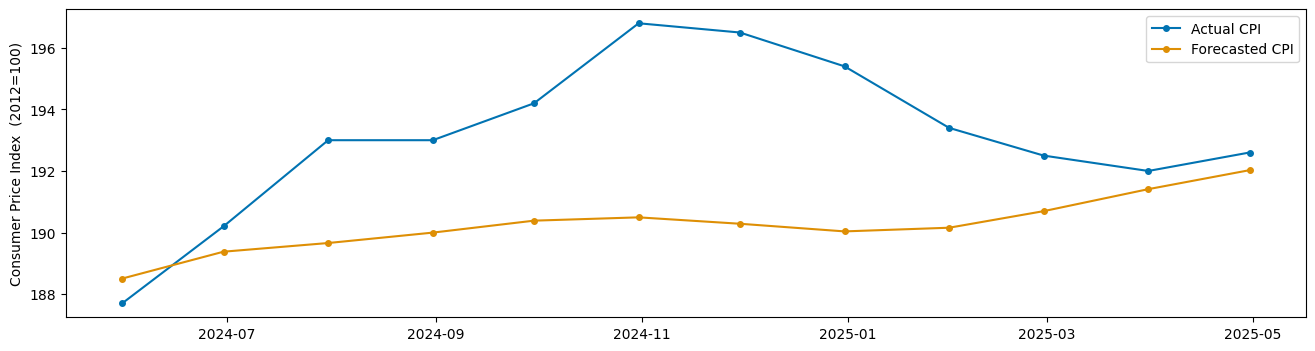

In [79]:
plot_series(y_actual, cpi_forecast_restored, labels=["Actual CPI", "Forecasted CPI"])

In [80]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(y_subset)
data_scaled = pd.DataFrame(data_scaled, columns=y_subset.columns, index=y_subset.index)

def create_sequences(data, target_col, time_steps=12):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i+time_steps].values)
        y.append(data.iloc[i+time_steps][target_col])
    return np.array(X), np.array(y)

time_steps = 12
target_col = 'Consumer Price Index  (2012=100)'

X, y = create_sequences(data_scaled, target_col, time_steps)


In [81]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dropout, Dense

input_shape = X.shape[1:]
inputs = Input(shape=input_shape)

x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.4)(x)

x = LSTM(128, return_sequences=True)(x)
x = Dropout(0.4)(x)
x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.4)(x)
x = LSTM(32, return_sequences=False)(x)
x = Dropout(0.4)(x)

output = Dense(1)(x)

model = Model(inputs, output)
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 12, 22)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 12, 128)        │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 6, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 6, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,017 (789.13 KB)

 Trainable params: 202,017 (789.13 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=1)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 356ms/step - loss: 0.3539 - mae: 0.5025 - val_loss: 0.5526 - val_mae: 0.7420
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1482 - mae: 0.3160 - val_loss: 0.1164 - val_mae: 0.3374
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0943 - mae: 0.2385 - val_loss: 0.0073 - val_mae: 0.0802
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0473 - mae: 0.1793 - val_loss: 0.0068 - val_mae: 0.0774
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0825 - mae: 0.2267 - val_loss: 0.0260 - val_mae: 0.1549
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0336 - mae: 0.1361 - val_loss: 0.0671 - val_mae: 0.2557
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0504 - mae: 0.1694 - val_loss: 0.0856 - val_mae: 0.2900
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0398 - mae: 0.1637 - val_loss: 0.0974 - val_mae: 0.3097
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0435 - mae:

In [83]:
y_pred = model.predict(X_test)

cpi_col = "Consumer Price Index  (2012=100)"
cpi_index = list(y_subset.columns).index(cpi_col)
dummy_pred = np.zeros((len(y_pred), len(y_subset.columns)))
dummy_test = np.zeros((len(y_test), len(y_subset.columns)))


y_pred_last = y_pred[:, -1, 0] if y_pred.ndim == 3 else y_pred[:, -1]
dummy_pred[:, cpi_index] = y_pred_last
dummy_test[:, cpi_index] = y_test.flatten()
y_pred_unscaled = scaler.inverse_transform(dummy_pred)[:, cpi_index]
y_test_unscaled = scaler.inverse_transform(dummy_test)[:, cpi_index]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


In [84]:
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
mape = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 1.71
MAPE: 0.89%


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='y_test'>)

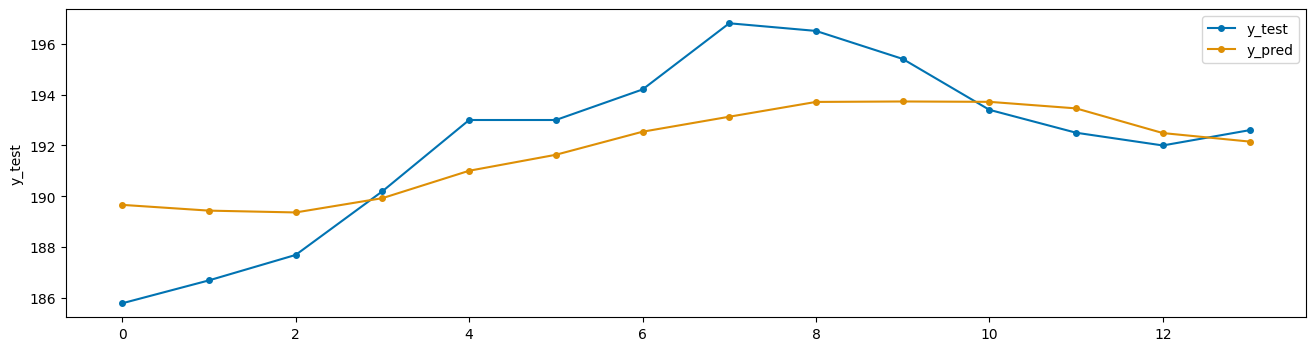

In [85]:
y_test_series = pd.Series(y_test_unscaled.flatten(), name="y_test")
y_pred_series = pd.Series(y_pred_unscaled.flatten(), name="y_pred")

plot_series(y_test_series, y_pred_series, labels=["y_test", "y_pred"])

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Consumer Price Index  (2012=100)'>)

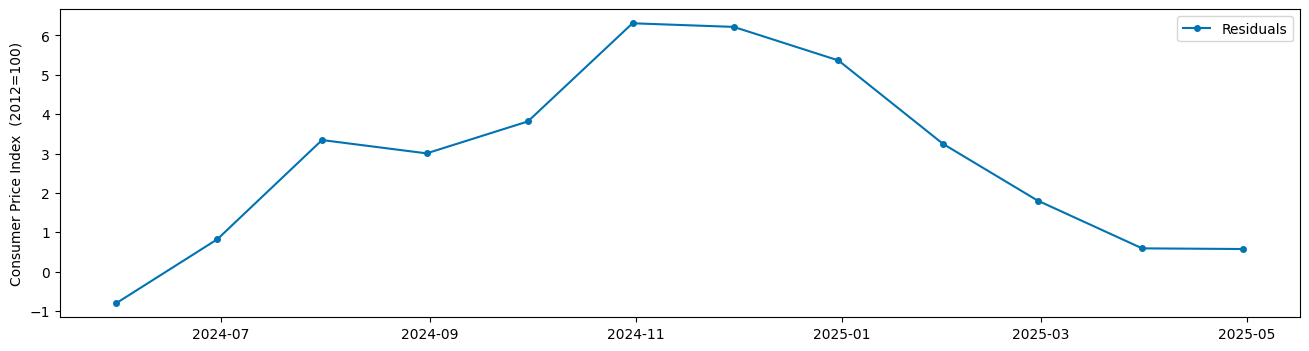

In [86]:
residuals = y_actual - cpi_forecast_restored
plot_series(residuals, labels=["Residuals"])

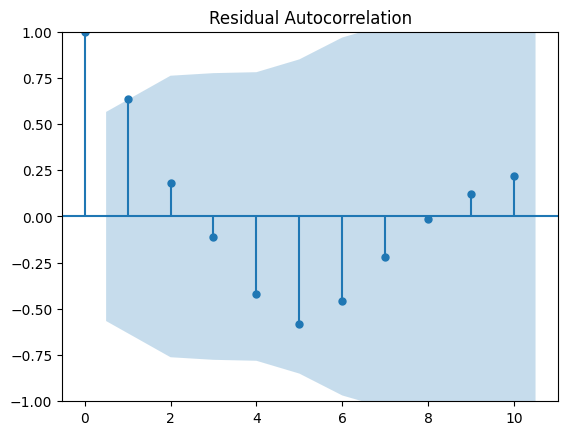

In [87]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals, lags=10)
plt.title('Residual Autocorrelation')
plt.show()


No reidual autocorrelation suggests that the model has fully captured the temporal structure